NISHCHAY PATEL

HW 2: Customer Churn Prediction

    Objective:

        The goal of this project is to predict customer churn in the Indian tele-
        com sector using demographic and usage data. You will explore data
        science techniques to build predictive models and determine which fac-
        tors are most influential in customer churn. Additionally, you will com-
        pare the performance of two encoding methods – OneHotEncoder and
        OrdinalEncoder – and evaluate their effect on model performance.

Libraries Import

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import numpy as np

Reading the csv files

In [178]:
demo = pd.read_csv('telecom_demographics.csv')
usage = pd.read_csv('telecom_usage.csv')

Basic Analysis

In [179]:
demo.isnull().sum()

customer_id           0
telecom_partner       0
gender                0
age                   0
state                 0
city                  0
pincode               0
registration_event    0
num_dependents        0
estimated_salary      0
dtype: int64

In [180]:
usage.isnull().sum()

customer_id    0
calls_made     0
sms_sent       0
data_used      0
churn          0
dtype: int64

Merged Files

In [181]:
combined = pd.merge(demo, usage, on='customer_id', how='inner')

In [182]:
combined = combined.drop(columns=['customer_id', 'pincode', 'registration_event'])

In [184]:
combined.sample()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
809,Airtel,M,39,Rajasthan,Hyderabad,1,59753,29,17,4571,1


In [185]:
combined['telecom_partner'].unique()

array(['Airtel', 'Reliance Jio', 'Vodafone', 'BSNL'], dtype=object)

In [187]:
combined['gender'].unique()

array(['F', 'M'], dtype=object)

In [188]:
combined['city'].unique()

array(['Delhi', 'Hyderabad', 'Chennai', 'Bangalore', 'Kolkata', 'Mumbai'],
      dtype=object)

In [189]:
combined['state'].unique()

array(['Himachal Pradesh', 'Uttarakhand', 'Jharkhand', 'Bihar',
       'Nagaland', 'West Bengal', 'Punjab', 'Arunachal Pradesh',
       'Maharashtra', 'Odisha', 'Kerala', 'Mizoram', 'Rajasthan',
       'Tripura', 'Gujarat', 'Tamil Nadu', 'Karnataka', 'Madhya Pradesh',
       'Manipur', 'Haryana', 'Telangana', 'Uttar Pradesh', 'Meghalaya',
       'Assam', 'Sikkim', 'Andhra Pradesh', 'Goa', 'Chhattisgarh'],
      dtype=object)

Train Test Split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(combined.iloc[:,0:10], combined.iloc[:,-1], test_size=0.2, random_state=42)

In [193]:
X_train.shape, X_test.shape

((5200, 10), (1300, 10))

In [191]:
X_train.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used
889,Vodafone,F,65,Bihar,Chennai,4,138069,84,16,7628
4385,BSNL,M,31,Rajasthan,Chennai,0,20262,98,34,908
4919,Reliance Jio,F,38,Himachal Pradesh,Chennai,1,28623,37,36,10076
4794,Airtel,M,63,Rajasthan,Chennai,1,49970,89,28,8522
5438,Reliance Jio,F,32,Madhya Pradesh,Hyderabad,2,116163,-4,11,2364


In [192]:
X_test.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used
3106,Reliance Jio,F,51,Sikkim,Kolkata,0,76263,95,4,4456
6161,Vodafone,F,65,Bihar,Kolkata,0,37170,55,53,4509
1867,Vodafone,M,67,Arunachal Pradesh,Hyderabad,1,105383,21,48,7905
3238,Airtel,M,33,Madhya Pradesh,Kolkata,0,90110,41,9,8822
5509,BSNL,F,73,Goa,Delhi,3,96820,66,1,8903


One Hot Encoder


In [194]:
telecom_partner_columns = ['telecom_partner_Airtel', 'telecom_partner_Reliance Jio', 'telecom_partner_Vodafone', 'telecom_partner_BSNL']
gender_columns = ['gender_F', 'gender_M']
city_columns = ['city_Delhi', 'city_Hyderabad', 'city_Chennai', 'city_Bangalore', 'city_Kolkata', 'city_Mumbai']
state_columns = [
    'state_Himachal Pradesh', 'state_Uttarakhand', 'state_Jharkhand', 'state_Bihar',
    'state_Nagaland', 'state_West Bengal', 'state_Punjab', 'state_Arunachal Pradesh',
    'state_Maharashtra', 'state_Odisha', 'state_Kerala', 'state_Mizoram', 'state_Rajasthan',
    'state_Tripura', 'state_Gujarat', 'state_Tamil Nadu', 'state_Karnataka', 'state_Madhya Pradesh',
    'state_Manipur', 'state_Haryana', 'state_Telangana', 'state_Uttar Pradesh', 'state_Meghalaya',
    'state_Assam', 'state_Sikkim', 'state_Andhra Pradesh', 'state_Goa', 'state_Chhattisgarh'
]

one_hot_encoded_columns = telecom_partner_columns + city_columns + gender_columns + state_columns

In [195]:
ohe = OneHotEncoder()

In [136]:
X_train_ohe = ohe.fit_transform(X_train[['telecom_partner', 'city', 'gender', 'state']]).toarray()
X_test_ohe = ohe.transform(X_test[['telecom_partner', 'city', 'gender', 'state']]).toarray()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=one_hot_encoded_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=one_hot_encoded_columns)

In [140]:
scaler = StandardScaler()

In [197]:
X_train_scaled = X_train.drop(columns=['telecom_partner', 'city', 'gender', 'num_dependents', 'state'])
X_train_scaled

,age,estimated_salary,calls_made,sms_sent,data_used
889,65,138069,84,16,7628
4385,31,20262,98,34,908
4919,38,28623,37,36,10076
4794,63,49970,89,28,8522
5438,32,116163,-4,11,2364
...,...,...,...,...,...
3772,32,134064,31,-3,-197
5191,59,100333,82,2,5962
5226,64,108529,73,12,9070
5390,64,78925,38,4,9108


In [143]:
X_test_scaled = X_test.drop(columns=['telecom_partner', 'city', 'gender', 'num_dependents', 'state'])

In [203]:
scaled_columns = X_train_scaled.columns
scaled_columns

Index(['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used'], dtype='object')

In [204]:
scaler.fit(X_train_scaled)

StandardScaler()

In [205]:
scaler.mean_

array([-1.66704257e-16,  1.43474975e-16,  6.01228469e-17,  3.79183864e-17,
        1.20245694e-16])

In [206]:
X_train_scaled = scaler.transform(X_train_scaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaled_columns)
X_train_scaled

,age,estimated_salary,calls_made,sms_sent,data_used
0,1.153247,1.399261,1.138185,-0.561000,0.885150
1,-0.909790,-1.738329,1.606730,0.672285,-1.398986
2,-0.485047,-1.515648,-0.434788,0.809317,1.717227
3,1.031892,-0.947106,1.305523,0.261190,1.189021
4,-0.849112,0.815832,-1.806956,-0.903579,-0.904090
...,...,...,...,...,...
5195,-0.849112,1.292595,-0.635593,-1.862801,-1.774576
5196,0.789182,0.394227,1.071250,-1.520222,0.318874
5197,1.092569,0.612513,0.770042,-0.835063,1.375287
5198,1.092569,-0.175939,-0.401321,-1.383190,1.388203


In [207]:
X_test_scaled = scaler.transform(X_test_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaled_columns)
X_test_scaled

,age,estimated_salary,calls_made,sms_sent,data_used
0,-2.772363,-2.277979,-1.622673,-1.752024,-1.707681
1,-2.720818,-2.278007,-1.667476,-1.521997,-1.707675
2,-2.713454,-2.277959,-1.705558,-1.545470,-1.707283
3,-2.838634,-2.277969,-1.683157,-1.728552,-1.707177
4,-2.691364,-2.277965,-1.655155,-1.766107,-1.707168
...,...,...,...,...,...
1295,-2.750272,-2.277928,-1.650675,-1.709774,-1.707806
1296,-2.857043,-2.277997,-1.717879,-1.747330,-1.707442
1297,-2.831271,-2.278018,-1.683157,-1.615886,-1.707635
1298,-2.838634,-2.278007,-1.705558,-1.545470,-1.708051


In [208]:
X_train_ohe.head()

,telecom_partner_Airtel,telecom_partner_Reliance Jio,telecom_partner_Vodafone,telecom_partner_BSNL,city_Delhi,city_Hyderabad,city_Chennai,city_Bangalore,city_Kolkata,city_Mumbai,...,state_Manipur,state_Haryana,state_Telangana,state_Uttar Pradesh,state_Meghalaya,state_Assam,state_Sikkim,state_Andhra Pradesh,state_Goa,state_Chhattisgarh
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
X_train_scaled.head()

,age,estimated_salary,calls_made,sms_sent,data_used
0,1.153247,1.399261,1.138185,-0.561000,0.885150
1,-0.909790,-1.738329,1.606730,0.672285,-1.398986
2,-0.485047,-1.515648,-0.434788,0.809317,1.717227
3,1.031892,-0.947106,1.305523,0.261190,1.189021
4,-0.849112,0.815832,-1.806956,-0.903579,-0.904090


In [210]:
X_train_final_ohe = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_train_final_ohe

,telecom_partner_Airtel,telecom_partner_Reliance Jio,telecom_partner_Vodafone,telecom_partner_BSNL,city_Delhi,city_Hyderabad,city_Chennai,city_Bangalore,city_Kolkata,city_Mumbai,...,state_Assam,state_Sikkim,state_Andhra Pradesh,state_Goa,state_Chhattisgarh,age,estimated_salary,calls_made,sms_sent,data_used
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.153247,1.399261,1.138185,-0.561000,0.885150
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.909790,-1.738329,1.606730,0.672285,-1.398986
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.485047,-1.515648,-0.434788,0.809317,1.717227
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.031892,-0.947106,1.305523,0.261190,1.189021
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.849112,0.815832,-1.806956,-0.903579,-0.904090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.849112,1.292595,-0.635593,-1.862801,-1.774576
5196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.789182,0.394227,1.071250,-1.520222,0.318874
5197,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.092569,0.612513,0.770042,-0.835063,1.375287
5198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.092569,-0.175939,-0.401321,-1.383190,1.388203


In [211]:
X_test_final_ohe = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_test_final_ohe

,telecom_partner_Airtel,telecom_partner_Reliance Jio,telecom_partner_Vodafone,telecom_partner_BSNL,city_Delhi,city_Hyderabad,city_Chennai,city_Bangalore,city_Kolkata,city_Mumbai,...,state_Assam,state_Sikkim,state_Andhra Pradesh,state_Goa,state_Chhattisgarh,age,estimated_salary,calls_made,sms_sent,data_used
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.772363,-2.277979,-1.622673,-1.752024,-1.707681
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.720818,-2.278007,-1.667476,-1.521997,-1.707675
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.713454,-2.277959,-1.705558,-1.545470,-1.707283
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.838634,-2.277969,-1.683157,-1.728552,-1.707177
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.691364,-2.277965,-1.655155,-1.766107,-1.707168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.750272,-2.277928,-1.650675,-1.709774,-1.707806
1296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.857043,-2.277997,-1.717879,-1.747330,-1.707442
1297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-2.831271,-2.278018,-1.683157,-1.615886,-1.707635
1298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-2.838634,-2.278007,-1.705558,-1.545470,-1.708051


DECISION TREE

Depth:3 has accuray of: 0.79


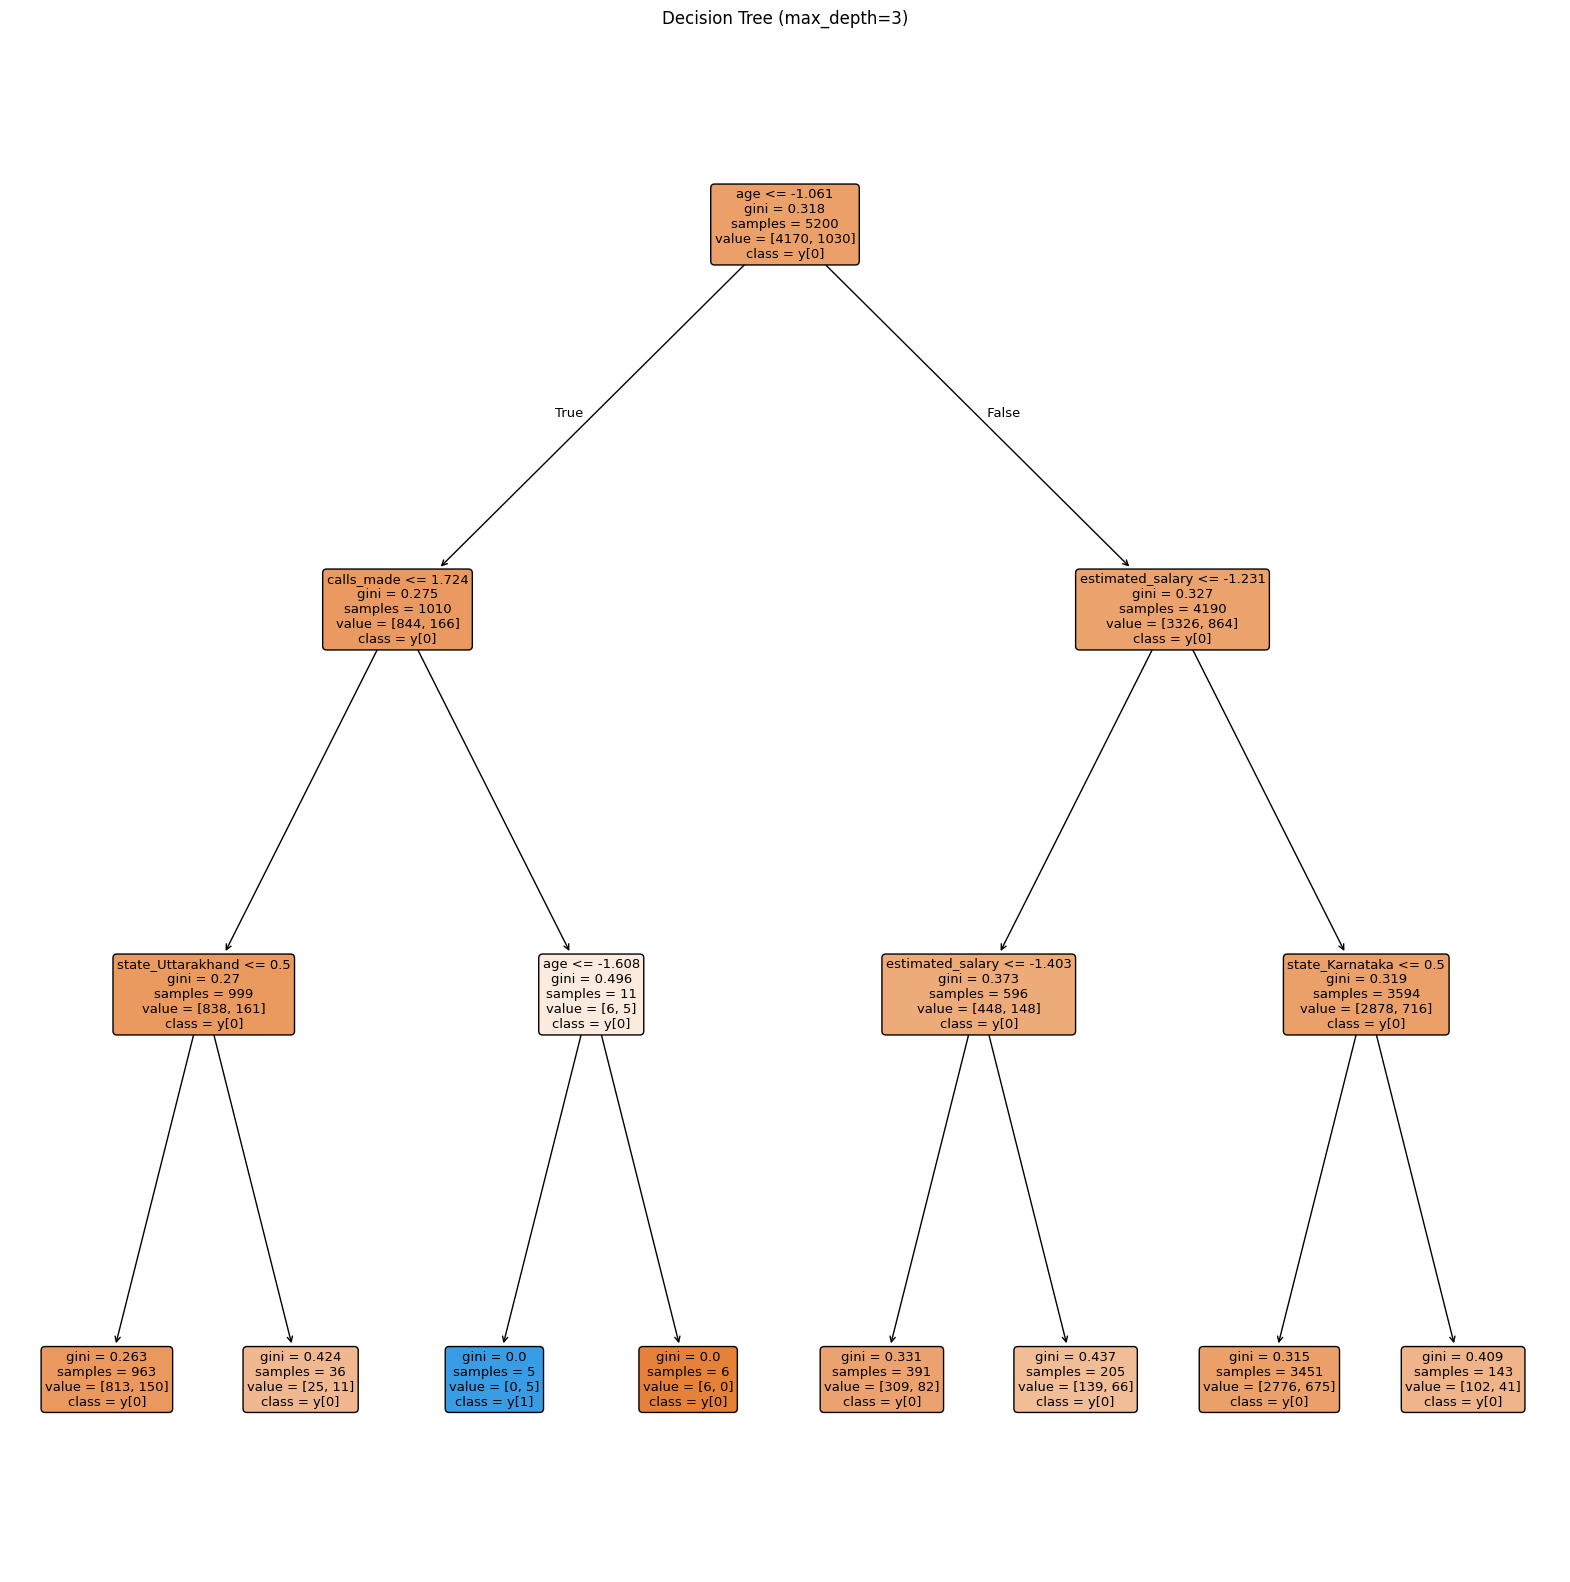

Depth:5 has accuray of: 0.79


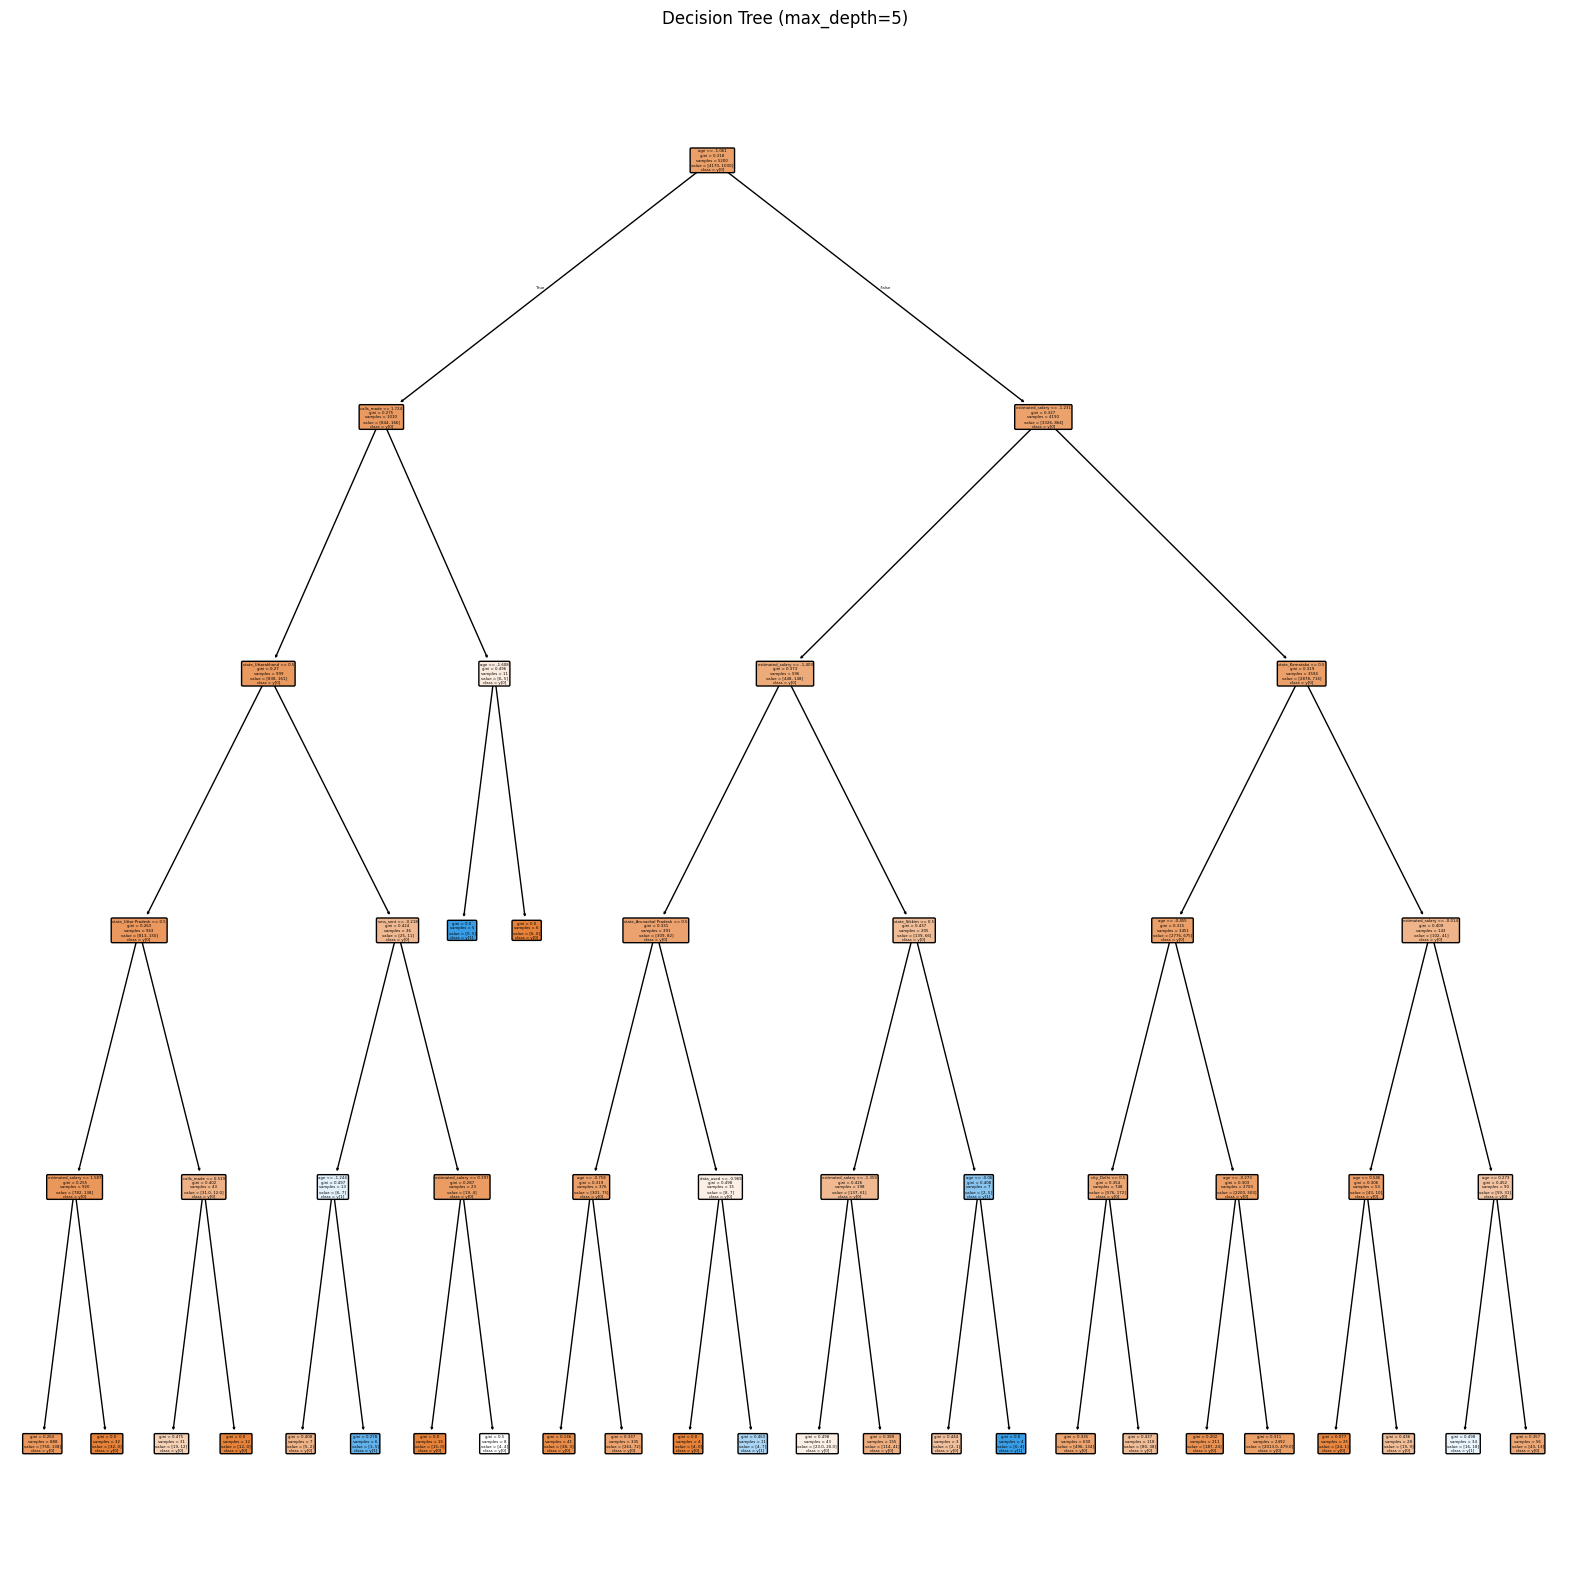

Depth:7 has accuray of: 0.7846153846153846


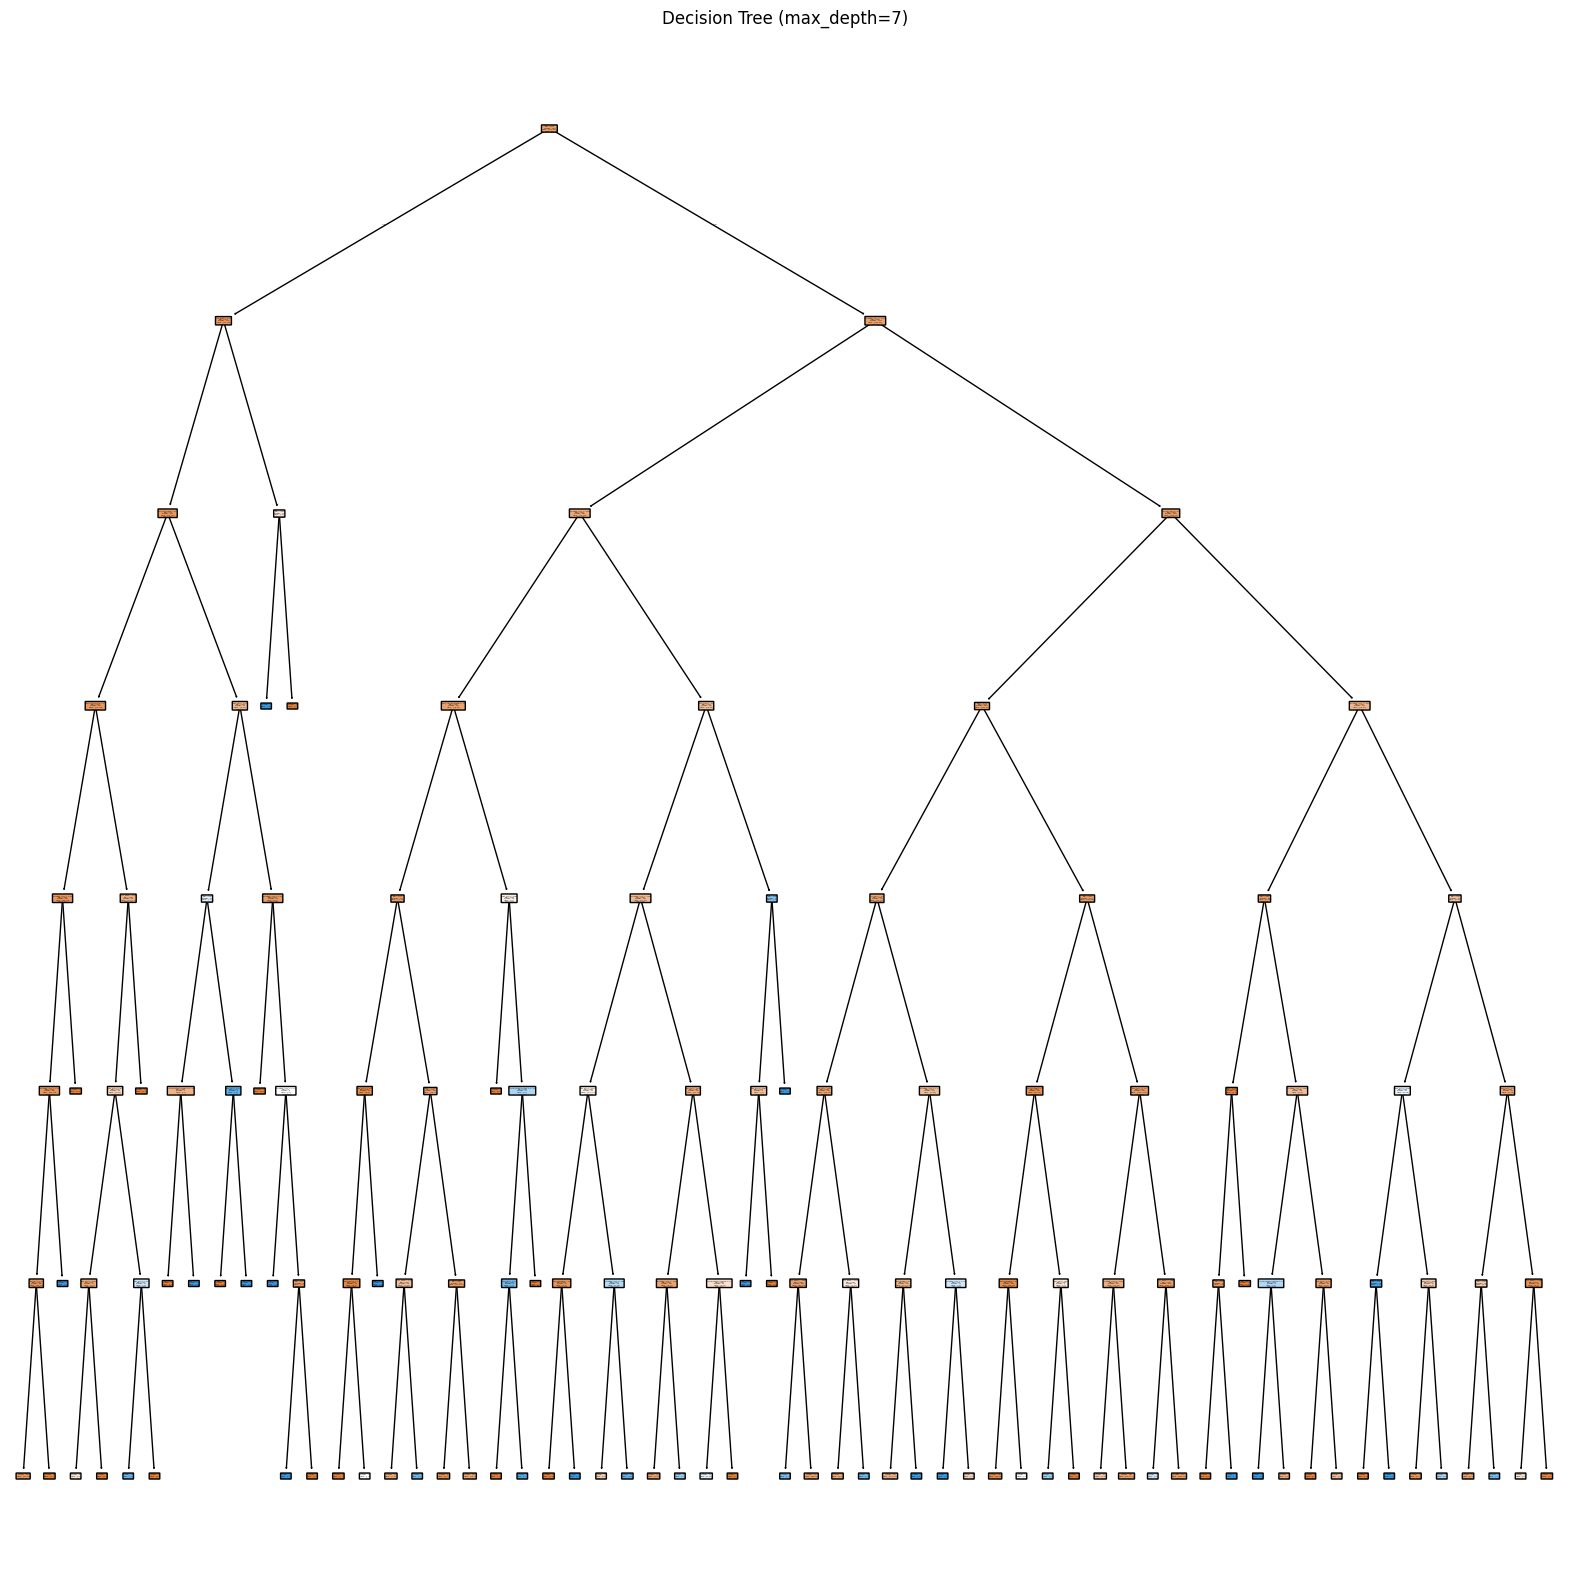

Depth:9 has accuray of: 0.7761538461538462


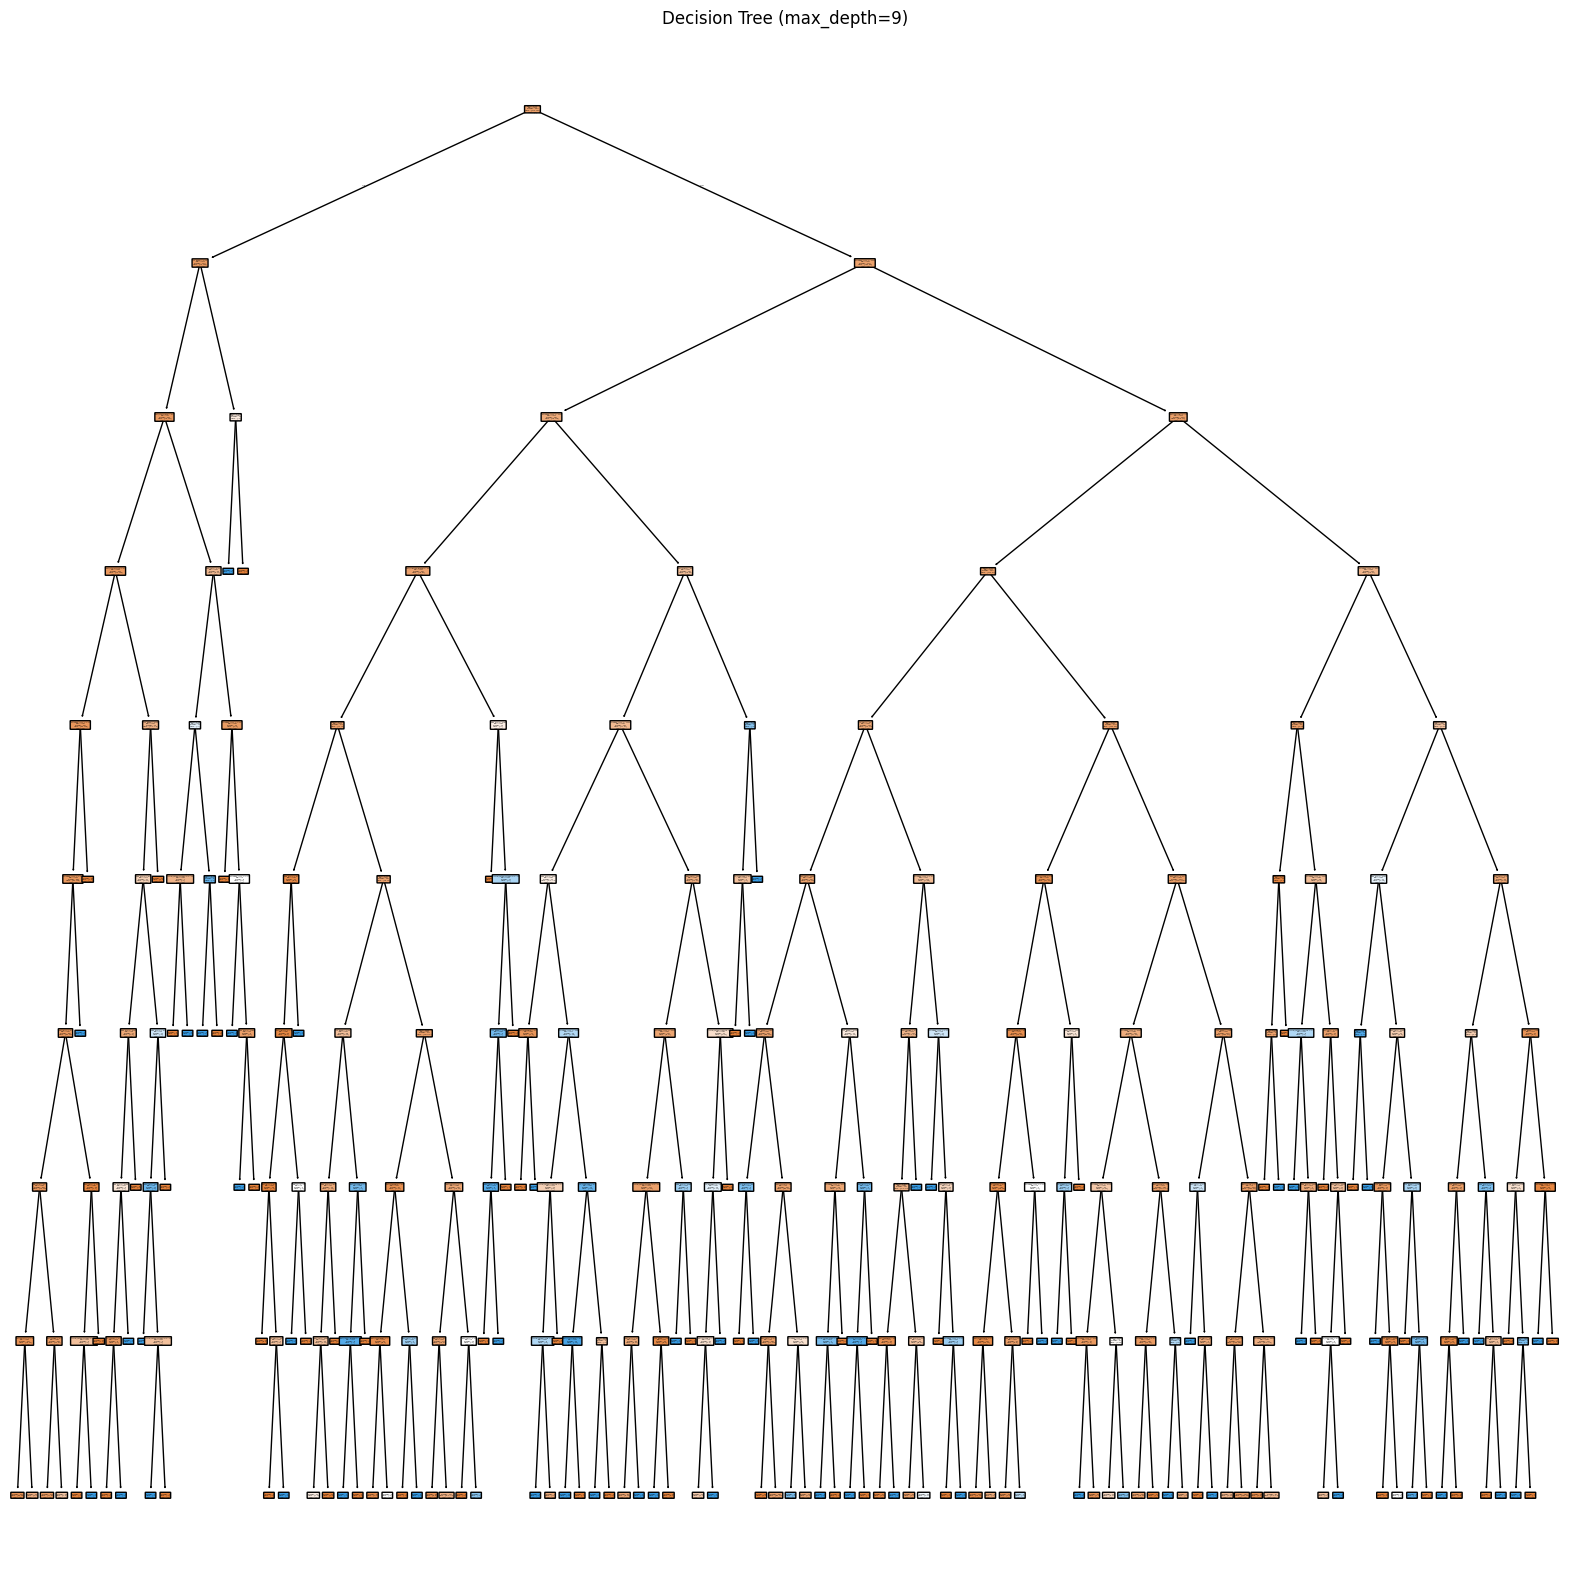

In [215]:
def decision_tree_ohe(max_depth, X_train_final_ohe, X_test_final_ohe):
    for i in max_depth:
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(X_train_final_ohe, y_train)
        y_pred = clf.predict(X_test_final_ohe)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Depth:{i} has accuray of: {accuracy}")
        plt.figure(figsize=(20, 20))
        tree.plot_tree(clf, filled=True, feature_names=X_train_final_ohe.columns, class_names=True, rounded=True)
        plt.title(f"Decision Tree (max_depth={i})")
        plt.show()

decision_tree_ohe([3,5,7,9], X_train_final_ohe, X_test_final_ohe)

RANDOM FOREST

In [214]:
def random_forest_ohe(n_estimators, X_train_final_ohe, X_test_final_ohe):
    
    for i in n_estimators:
        clf = RandomForestClassifier(n_estimators=i, random_state=42)

        clf.fit(X_train_final_ohe, y_train)

        y_pred = clf.predict(X_test_final_ohe)
        accuracy = accuracy_score(y_test, y_pred)
        print(accuracy)

random_forest_ohe([10,20,30,40,60], X_train_final_ohe, X_test_final_ohe)

0.7830769230769231
0.7861538461538462
0.79
0.79
0.79


------

ORDINAL ENCODER

In [216]:
ordinal_columns = ['telecom_partner', 'city', 'gender', 'state']

ordinal_encoder = OrdinalEncoder()

X_train_ordinal = ordinal_encoder.fit_transform(X_train[ordinal_columns])
X_test_ordinal = ordinal_encoder.transform(X_test[ordinal_columns])

X_train_ordinal_df = pd.DataFrame(X_train_ordinal, columns=ordinal_columns)
X_test_ordinal_df = pd.DataFrame(X_test_ordinal, columns=ordinal_columns)

print(X_train_ordinal_df.head())


   telecom_partner  city  gender  state
0              3.0   1.0     0.0    3.0
1              1.0   1.0     1.0   20.0
2              2.0   1.0     0.0    8.0
3              0.0   1.0     1.0   20.0
4              2.0   3.0     0.0   12.0


In [217]:
X_train_final_ordinal = pd.concat([X_train_ordinal_df, X_train_scaled], axis=1)
X_train_final_ordinal.shape

(5200, 9)

In [218]:
X_test_final_ordinal = pd.concat([X_test_ordinal_df, X_test_scaled], axis=1)
X_test_final_ordinal.shape

(1300, 9)

In [170]:
scaled_col = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']

DECISION TREE

Max Depth: 3 has accuracy : 0.79

Feature Importances for Depth: 3
                  Importance
age                 0.410321
estimated_salary    0.289179
state               0.207962
calls_made          0.092538
telecom_partner     0.000000
city                0.000000
gender              0.000000
sms_sent            0.000000
data_used           0.000000


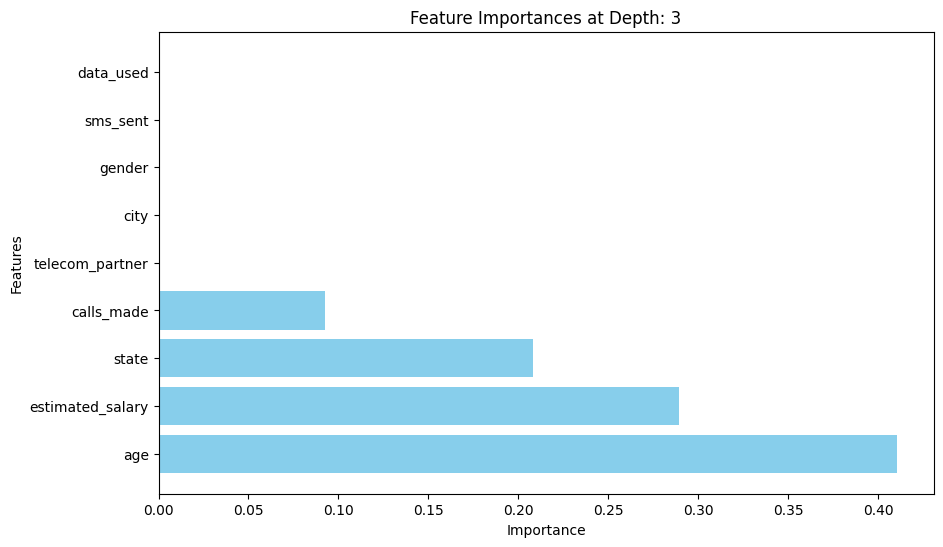

Max Depth: 5 has accuracy : 0.7538461538461538

Feature Importances for Depth: 5
                  Importance
data_used           0.270364
age                 0.195794
estimated_salary    0.126234
sms_sent            0.105503
telecom_partner     0.103283
state               0.097550
calls_made          0.054334
gender              0.030005
city                0.016932


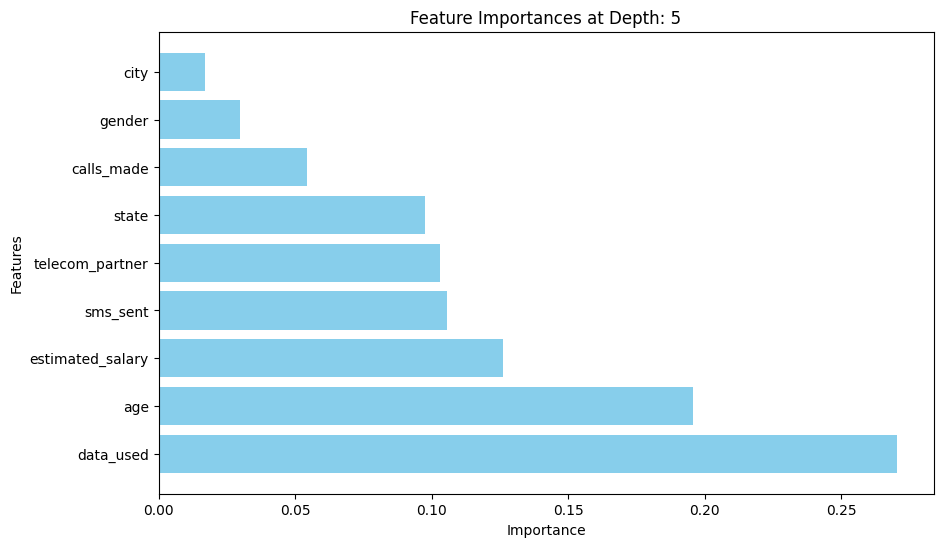

Max Depth: 7 has accuracy : 0.7538461538461538

Feature Importances for Depth: 7
                  Importance
age                 0.224338
data_used           0.190073
calls_made          0.179421
estimated_salary    0.150261
sms_sent            0.108008
telecom_partner     0.075033
state               0.046548
city                0.014930
gender              0.011389


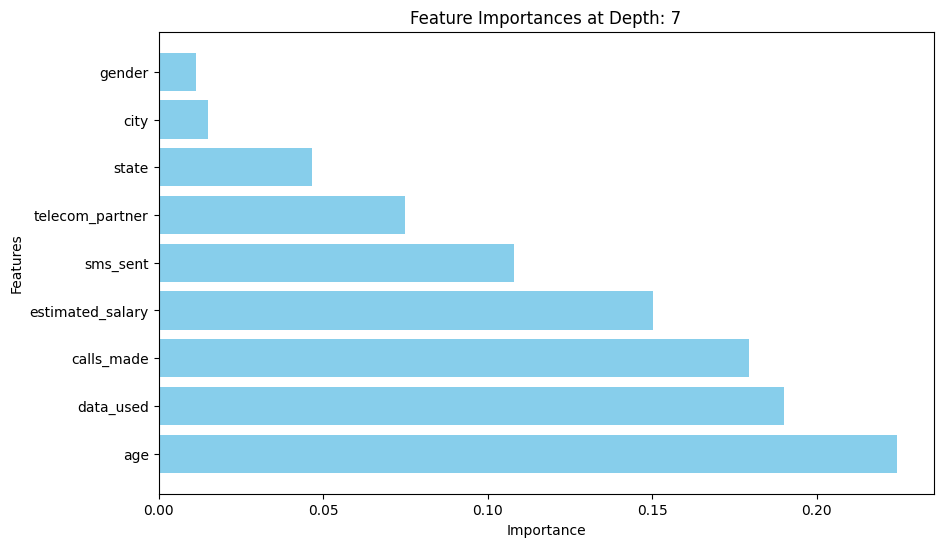

Max Depth: 9 has accuracy : 0.7538461538461538

Feature Importances for Depth: 9
                  Importance
data_used           0.209013
calls_made          0.188331
estimated_salary    0.167600
age                 0.158692
sms_sent            0.109348
state               0.067249
telecom_partner     0.048510
city                0.037195
gender              0.014063


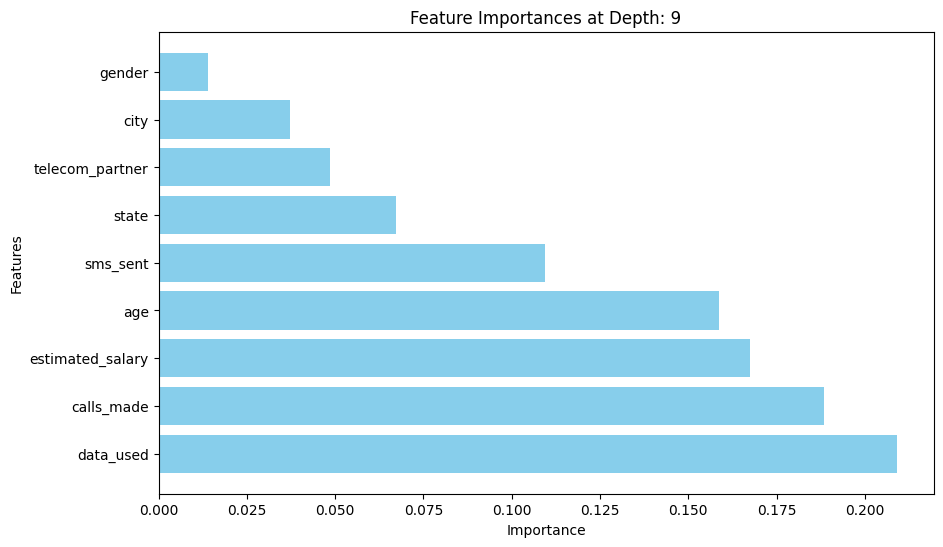

In [220]:
def decision_tree_ordinal(max_depth, X_train_final_ordinal, X_test_final_ordinal):

    for i in max_depth:
        clf = DecisionTreeClassifier(max_depth=i, random_state=42)
        
        clf.fit(X_train_final_ordinal, y_train)
        
        y_pred = clf.predict(X_test_final_ordinal)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Max Depth: {i} has accuracy : {accuracy}")
        
        importances = clf.feature_importances_
        
        feature_importances = pd.DataFrame(importances, index=ordinal_columns+scaled_col, columns=["Importance"]).sort_values("Importance", ascending=False)
        
        print("\nFeature Importances for Depth:", i)
        print(feature_importances)
        
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importances at Depth: {i}")
        plt.barh(feature_importances.index, feature_importances["Importance"], color='skyblue')
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.show()

decision_tree_ordinal([3,5,7,9], X_train_final_ordinal, X_test_final_ordinal)

In [221]:
def random_forest_ordinal(n_estimators,X_train_final_ordinal, X_test_final_ordinal):
    
    for i in n_estimators:
        clf = RandomForestClassifier(n_estimators=i, random_state=42)

        clf.fit(X_train_final_ordinal, y_train)

        y_pred = clf.predict(X_test_final_ordinal)
        accuracy = accuracy_score(y_test, y_pred)
        print(accuracy)

random_forest_ordinal([10,20,30,40,60],X_train_final_ordinal, X_test_final_ordinal)

0.7438461538461538
0.7892307692307692
0.79
0.79
0.79
